### 1.  Data Collection And Preparation

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [66]:
# Loading the dataset
hair_data = pd.read_csv('Data/Predict Hair Fall.csv')
hair_data.reset_index(drop=True, inplace=True)

# Checking the structure of the dataset
print(hair_data.info(), '\n\n')
print(hair_data.isnull().sum(), '\n\n')

# Although it looks like there are no missing values in this dataset, however, the missing data is represented as 'No Data' string
hair_data.replace(['No Data', 'No data'], pd.NA , inplace=True)
print(hair_data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Id                         999 non-null    int64 
 1   Genetics                   999 non-null    object
 2   Hormonal Changes           999 non-null    object
 3   Medical Conditions         999 non-null    object
 4   Medications & Treatments   999 non-null    object
 5   Nutritional Deficiencies   999 non-null    object
 6   Stress                     999 non-null    object
 7   Age                        999 non-null    int64 
 8   Poor Hair Care Habits      999 non-null    object
 9   Environmental Factors      999 non-null    object
 10  Smoking                    999 non-null    object
 11  Weight Loss                999 non-null    object
 12  Hair Loss                  999 non-null    int64 
dtypes: int64(3), object(10)
memory usage: 101.6+ KB
None 


Id       

In [67]:
# Changing the column names and adding underscore for better readability
columns = ['Id', 'Genetics', 'Hormonal_Changes', 'Medical_Conditions',
       'Medications_and_Treatments', 'Nutritional_Deficiencies', 'Stress',
       'Age', 'Poor_Hair_Care_Habits', 'Environmental_Factors', 'Smoking',
       'Weight_Loss', 'Hair_Loss']

hair_data.columns = columns

hair_data.columns = [col.replace(' ', '_') for col in hair_data.columns]
print(hair_data.columns)

Index(['Id', 'Genetics', 'Hormonal_Changes', 'Medical_Conditions',
       'Medications_and_Treatments', 'Nutritional_Deficiencies', 'Stress',
       'Age', 'Poor_Hair_Care_Habits', 'Environmental_Factors', 'Smoking',
       'Weight_Loss', 'Hair_Loss'],
      dtype='object')


In [68]:
# Printing the unqiue values in a column to see which columns need encoding
print(hair_data['Genetics'].unique())
print(hair_data['Hormonal_Changes'].unique())
print(hair_data['Poor_Hair_Care_Habits'].unique())
print(hair_data['Environmental_Factors'].unique())
print(hair_data['Smoking'].unique())
print(hair_data['Weight_Loss'].unique())



['Yes' 'No']
['No' 'Yes']
['Yes' 'No']
['Yes' 'No']
['No' 'Yes']
['No' 'Yes']


In [69]:

print(hair_data.head())
hair_data['Genetic_Encoding'] = hair_data['Genetics'].map({'Yes': 1, 'No': 0})
hair_data['Hormonal_Encoding'] = hair_data['Hormonal_Changes'].map({'Yes': 1, 'No': 0})
hair_data['Poor_Hair_Care_Encoding'] = hair_data['Poor_Hair_Care_Habits'].map({'Yes': 1, 'No': 0})
hair_data['Environmental_Encoding'] = hair_data['Environmental_Factors'].map({'Yes': 1, 'No': 0})
hair_data['Smoking_Encoding'] = hair_data['Smoking'].map({'Yes': 1, 'No': 0})
hair_data['Weight_Loss_Encoding'] = hair_data['Weight_Loss'].map({'Yes': 1, 'No': 0})


       Id Genetics Hormonal_Changes Medical_Conditions  \
0  133992      Yes               No               <NA>   
1  148393       No               No             Eczema   
2  155074       No               No         Dermatosis   
3  118261      Yes              Yes           Ringworm   
4  111915       No               No          Psoriasis   

  Medications_and_Treatments Nutritional_Deficiencies    Stress  Age  \
0                       <NA>     Magnesium deficiency  Moderate   19   
1                Antibiotics     Magnesium deficiency      High   43   
2           Antifungal Cream       Protein deficiency  Moderate   26   
3                Antibiotics       Biotin Deficiency   Moderate   46   
4                   Accutane          Iron deficiency  Moderate   30   

  Poor_Hair_Care_Habits Environmental_Factors Smoking Weight_Loss  Hair_Loss  
0                   Yes                   Yes      No          No          0  
1                   Yes                   Yes      No       

In [70]:
print(hair_data['Medical_Conditions'].unique(), '\n')
print(hair_data['Medications_and_Treatments'].unique(), '\n')
print(hair_data['Nutritional_Deficiencies'].unique(), '\n')
print(hair_data['Stress'].unique(), '\n')


[<NA> 'Eczema' 'Dermatosis' 'Ringworm' 'Psoriasis' 'Alopecia Areata '
 'Scalp Infection' 'Seborrheic Dermatitis' 'Dermatitis' 'Thyroid Problems'
 'Androgenetic Alopecia'] 

[<NA> 'Antibiotics' 'Antifungal Cream' 'Accutane' 'Chemotherapy'
 'Steroids' 'Rogaine' 'Blood Pressure Medication' 'Immunomodulators'
 'Antidepressants ' 'Heart Medication '] 

['Magnesium deficiency' 'Protein deficiency' 'Biotin Deficiency '
 'Iron deficiency' 'Selenium deficiency' 'Omega-3 fatty acids'
 'Zinc Deficiency' 'Vitamin A Deficiency' 'Vitamin D Deficiency' <NA>
 'Vitamin E deficiency'] 

['Moderate' 'High' 'Low'] 



In [71]:
# cleaning trailing spaces

hair_data['Medical_Conditions'] = hair_data['Medical_Conditions'].str.strip()
hair_data['Medications_and_Treatments'] = hair_data['Medications_and_Treatments'].str.strip()
hair_data['Nutritional_Deficiencies'] = hair_data['Nutritional_Deficiencies'].str.strip()

In [72]:
# Encodin stress levels based on the ordinal nature of the data
hair_data['Stress_Level'] = hair_data['Stress'].map({'Low': 0, 'Moderate': 1, 'High': 2})

In [73]:
# Doing one hot encoding for categorical columns with multiple categories

# hair_data = pd.get_dummies(hair_data, columns=['Medical_Conditions', 'Medications_and_Treatments', 'Nutritional_Deficiencies'])
# print(hair_data.columns)

### 3.  Data Processing (Handling Missing Values)

In [74]:
# Checking again the missing values
print(hair_data.isnull().sum())


Id                              0
Genetics                        0
Hormonal_Changes                0
Medical_Conditions            110
Medications_and_Treatments      2
Nutritional_Deficiencies       80
Stress                          0
Age                             0
Poor_Hair_Care_Habits           0
Environmental_Factors           0
Smoking                         0
Weight_Loss                     0
Hair_Loss                       0
Genetic_Encoding                0
Hormonal_Encoding               0
Poor_Hair_Care_Encoding         0
Environmental_Encoding          0
Smoking_Encoding                0
Weight_Loss_Encoding            0
Stress_Level                    0
dtype: int64


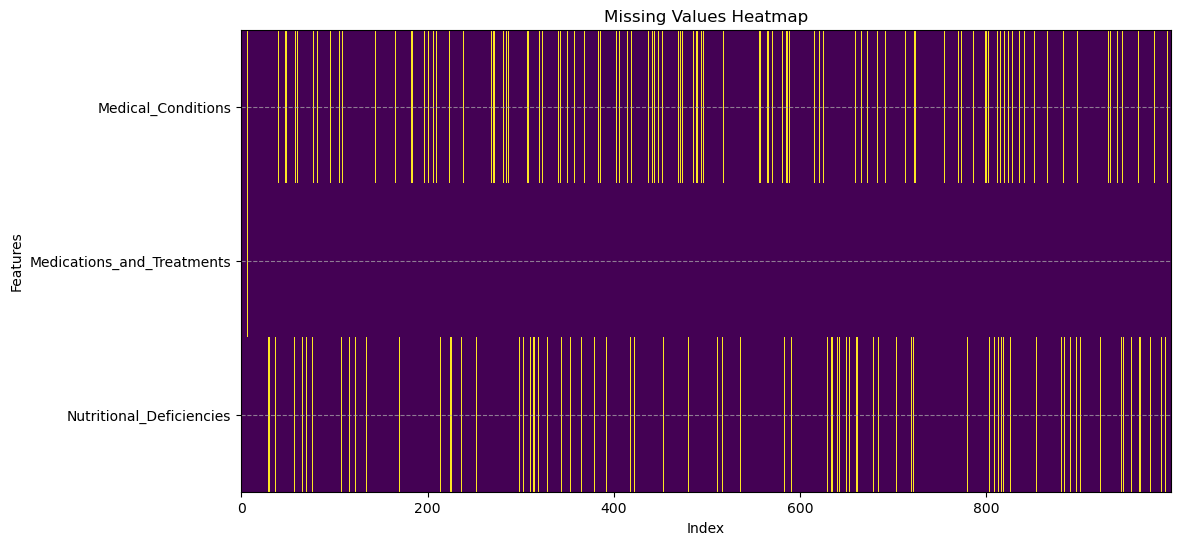

In [75]:
import matplotlib.pyplot as plt

# Subset of columns to check
df_hair_data_subset = hair_data[["Medical_Conditions", "Medications_and_Treatments", "Nutritional_Deficiencies"]]

# Mask for NaNs and convert to int
nan_array = df_hair_data_subset.isna().astype(int).to_numpy()

plt.figure(figsize=(12, 6))

# Transpose to have features on y-axis, index on x-axis
im = plt.imshow(nan_array.T, interpolation='nearest', aspect='auto', cmap='viridis')

plt.xlabel('Index')
plt.ylabel('Features')
plt.title('Missing Values Heatmap')

# Set y-axis labels
plt.yticks(range(len(df_hair_data_subset.columns)), df_hair_data_subset.columns)

plt.grid(True, axis='y', linestyle='--', alpha=0.7)

plt.show()


It is clear from the heatmap that data is MCAR. But for another check, we will do the Little Test just to be sure.
Moreover, the missing pattern is the general pattern.

1) Because missing values for Medications and Treatments are only two, either we can either drop these rows or use the Simple Imputer from scikit learn. I have decided to drop these rows.
2) For the other two columns, Simple Imputer can't work, because it would just assign the most frequent value to the missing value, and I believe doing that for medical conditions and Medications adn Treatments will be very wrong.